In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\233de0c4-26bf-49fe-b38f-25534e55cca1_Timeseries.zip.ca1\\Timeseries\\exchange_rate.csv")
print("Column names in the dataset:", data.columns)
print(data.head())

Column names in the dataset: Index(['date', 'Ex_rate'], dtype='object')
               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


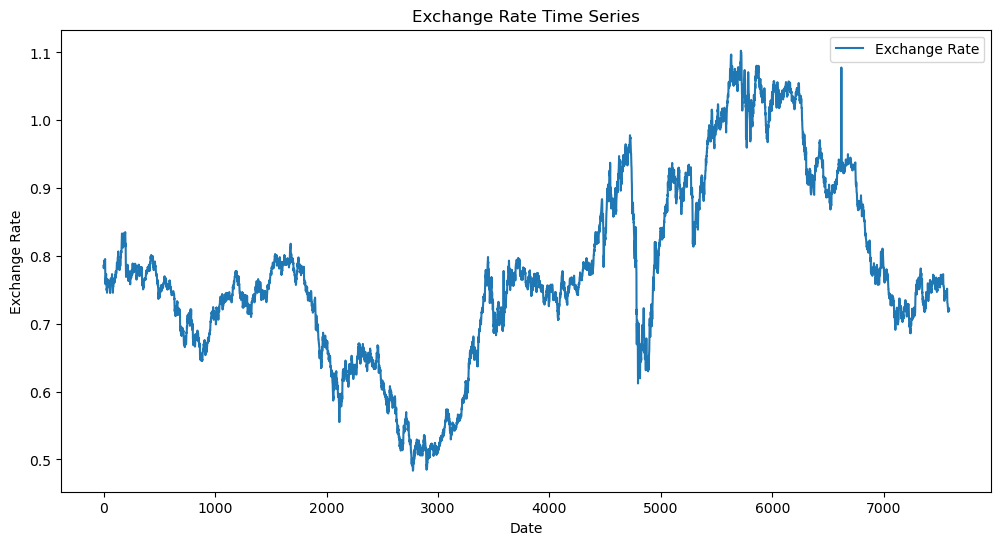

In [11]:
#2. Plot the Time Series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [12]:
#3.Handle missing values
data['Ex_rate'] = data['Ex_rate'].interpolate()  # Or use .ffill() for forward fill


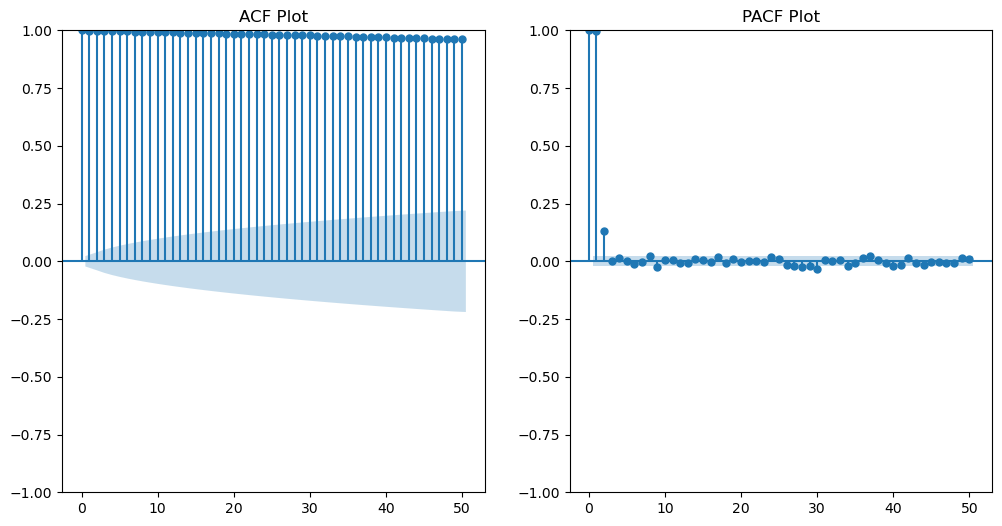

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 24 Aug 2024   AIC                         -56102.322
Time:                        22:39:24   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

In [13]:
#4. ARIMA Model Building
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))  # Example parameters
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


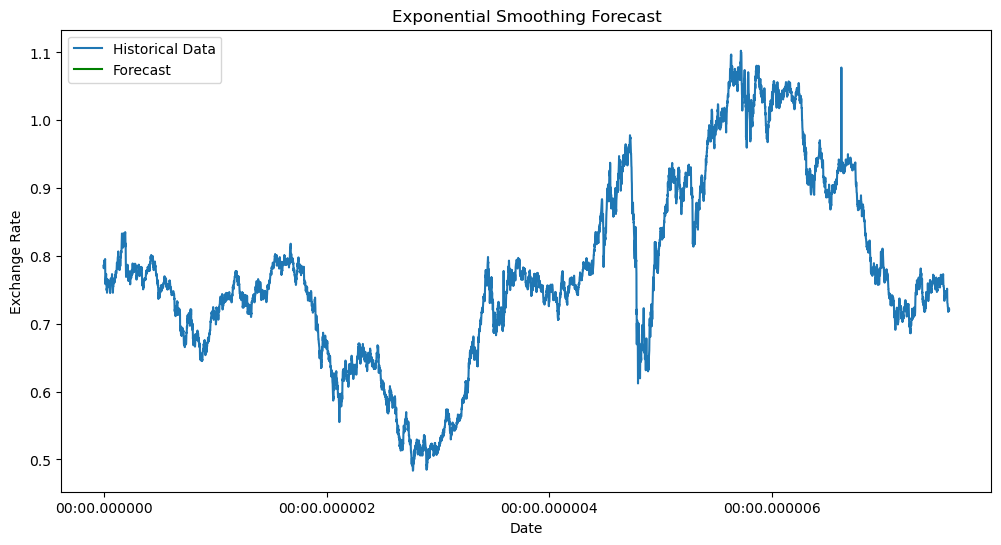

In [17]:
#5. Exponential Smoothing Model Building
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data
data = pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\233de0c4-26bf-49fe-b38f-25534e55cca1_Timeseries.zip.ca1\\Timeseries\\exchange_rate.csv")
data.index = pd.to_datetime(data.index)

# Holt-Winters' Seasonal Model
model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecasting
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast index
# The frequency of the index should match the data frequency (e.g., daily if your data is daily)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Historical Data')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [20]:
# Check for missing values in actual and forecasted data
import numpy as np
print("Missing values in actual data:", data['Ex_rate'].isnull().sum())
print("Missing values in ARIMA forecast:", np.isnan(arima_forecast).sum())
print("Missing values in Exponential Smoothing forecast:", np.isnan(exp_smoothing_forecast).sum())

# If there are missing values, you might need to handle them
# Example of handling NaNs (you could also interpolate or fill them)
data['Ex_rate'] = data['Ex_rate'].fillna(method='ffill')  # Forward fill
arima_forecast = np.nan_to_num(arima_forecast)  # Replace NaNs with 0
exp_smoothing_forecast = np.nan_to_num(exp_smoothing_forecast)  # Replace NaNs with 0


Missing values in actual data: 0
Missing values in ARIMA forecast: 0
Missing values in Exponential Smoothing forecast: 12
